In [3]:
### IMPORT LIBRARIES ###

# IMPORT SCIENTIFIC LIBRARIES
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib widget
%matplotlib inline
import pandas as pd
import seaborn as sns

# IMPORT CUSTOM LIBRARIES
from alias import *
from functions import *

# Dynamic range
From the momentum and energy conservation
$$
\begin{aligned}
\vec{Q} = \vec{k}_i - \vec{k}_f \\
\omega = \omega_i - \omega_f
\end{aligned}
$$
and the vectorial relation
$$
|\vec{k}_i - \vec{k}_f| = \sqrt{k_i^2 + k_f^2 - 2 k_i k_f \cos \theta}
$$
we can derive the dynamic range
$$
Q = k_f \sqrt{2 + \frac{\omega}{E_f} - 2\sqrt{1 + \frac{\omega}{E_f}}\cos\theta} \hspace{1cm} k_f=2\pi\sqrt{\frac{E_f}{81.80}}
$$
In our case the role played by the scattering angle $\theta$ is to limit the dynamic range because of the direct beam contribution. In the experiment this angle is limited to $\theta > 1^\circ$.


In [4]:
Q = lambda omega, theta, Ef: 2*np.pi*np.sqrt(Ef/81.80) * np.sqrt(2 + omega/Ef - 2*np.sqrt(1 + omega/Ef)*np.cos(theta))

In [5]:
data_L = np.array([  [2.022116903633491, 4.538152610441767],
            [3.0331753554502368, 6.78714859437751],
            [3.993680884676145, 8.875502008032129],
            [5.004739336492891, 11.04417670682731],
            [6.015797788309636, 12.771084337349398],
            [7.001579778830964, 15.02008032128514],
            [7.98736176935229, 16.06425702811245],
            [8.998420221169036, 16.746987951807228],
            [10.06003159557662, 17.550200803212853],
            [10.96998420221169, 14.216867469879517],
            [11.981042654028435, 13.293172690763052],
            [14.003159557661927, 12.650602409638553],
            [14.988941548183254, 13.132530120481928]])


data_T = np.array([[6.976303317535545, 8.393574297188755],
        [7.962085308056872, 8.55421686746988],
        [8.92259083728278, 8.594377510040161],
        [9.908372827804108, 9.076305220883533],
        [10.96998420221169, 8.473895582329318],
        [12.056872037914692, 7.991967871485944],
        [13.95260663507109, 8.594377510040161],
        [15.06477093206951, 8.91566265060241]])

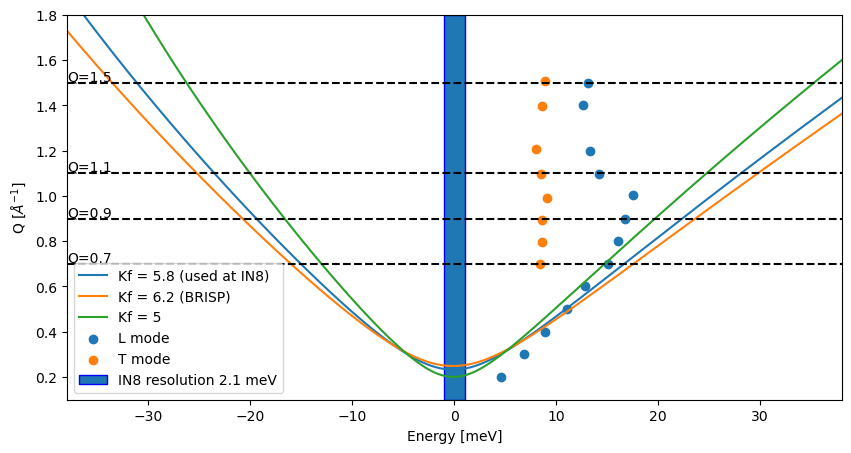

In [7]:


plt.figure(figsize=(10, 5))
X = np.arange (-50, 50, 0.01)

plt.plot(X, Q(X, np.deg2rad(2.3), k2E(5.8)), label='Kf = 5.8 (used at IN8)')
plt.plot(X, Q(X, np.deg2rad(2.3), k2E(6.2)), label='Kf = 6.2 (BRISP)')
plt.plot(X, Q(X, np.deg2rad(2.3), k2E(5)), label='Kf = 5')

plt.scatter(data_L[:,1], data_L[:,0]/10, label='L mode')
plt.scatter(data_T[:,1], data_T[:,0]/10, label='T mode')

plt.axvspan(-1.05, 1.05, edgecolor="b",  label='IN8 resolution 2.1 meV')

for q in Qs:
    plt.axhline(q, color='black', linestyle='--')
    plt.text(-38, q+0.01, 'Q='+str(q), color='black')


plt.xlabel('Energy [meV]')
plt.ylabel('Q [$\AA^{-1}$]')
plt.xlim(-38,38)
plt.ylim(0.1, 1.8)
plt.legend()